In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

# CES 3 Report

In [2]:
df3 = pd.read_csv('data/ces3results/CES_3.csv', index_col = 'Census Tract')

In [3]:
df3.head(2)

,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,48.524,95.54,681.20,80.92,2.75,47.82,18551.957190,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0.00,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),Yes,0.062,91.10,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.236622,89.05,782.26,55.66,66.2,97.68,36.00,85.57,1.250,88.77,5,55.01,12.00,92.17,81.19,10.00,100.00,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11


### Drop Uneeded Columns

In [4]:
df3.drop(columns = ['ZIP', 'Nearby City \n(to help approximate location only)', 'Longitude', 
                   'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile', 'CES 3.0 \nPercentile Range', 'Ozone Pctl', 
                   'PM2.5 Pctl', 'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 
                   'Traffic Pctl', 'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 
                   'Imp. Water Bodies Pctl', 'Solid Waste Pctl', 'Pollution Burden Pctl', 'Asthma', 'Asthma Pctl', 
                   'Low Birth Weight Pctl', 'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education Pctl', 
                   'Linguistic Isolation Pctl', 'Poverty Pctl', 'Unemployment Pctl', 'Housing Burden Pctl', 
                   'Pop. Char. ', 'Pop. Char. Pctl'], axis = 1, inplace = True)

In [5]:
df3.head(2)

,Total Population,California County,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Poverty,Unemployment,Housing Burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,79.96,9.85,7.44,53.3,16.2,76.3,17.6,26.0,9.55
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,81.19,10.00,7.04,53.3,33.4,72.5,12.3,34.1,9.07


### Check for NaNs

In [6]:
df3.isna().sum()

Total Population                    0
California County                   0
SB 535 Disadvantaged Community      0
Ozone                               0
PM2.5                              19
Diesel PM                           0
Drinking Water                     18
Pesticides                          0
Tox. Release                        0
Traffic                            56
Cleanup Sites                       0
Groundwater Threats                 0
Haz. Waste                          0
Imp. Water Bodies                   0
Solid Waste                         0
Pollution Burden                    0
Pollution Burden Score              0
Low Birth Weight                  222
Education                          96
Linguistic Isolation              242
Poverty                            79
Unemployment                      155
Housing Burden                    157
Pop. Char. Score                  106
dtype: int64

In [7]:
#PM2.5 
df3['PM2.5'] = df3['PM2.5'].fillna(df3['PM2.5'].mean())

#Drinking Water
df3['Drinking Water'] = df3['Drinking Water'].fillna(df3['Drinking Water'].mean())

#Traffic 
df3['Traffic'] = df3['Traffic'].fillna(df3['Traffic'].mean())

#Traffic 
df3['Traffic'] = df3['Traffic'].fillna(df3['Traffic'].mean())

#Low Birth Weight
df3['Low Birth Weight'] = df3['Low Birth Weight'].fillna(df3['Low Birth Weight'].mean())

#Education
df3['Education'] = df3['Education'].fillna(df3['Education'].mean())

#Linguistic Isolation
df3['Linguistic Isolation'] = df3['Linguistic Isolation'].fillna(df3['Linguistic Isolation'].mean())

#Poverty
df3['Poverty'] = df3['Poverty'].fillna(df3['Poverty'].mean())

#Unemployment
df3['Unemployment'] = df3['Unemployment'].fillna(df3['Unemployment'].mean())

#Housing Burden
df3['Housing Burden'] = df3['Housing Burden'].fillna(df3['Housing Burden'].mean())

#Pop. Char. Score
df3['Pop. Char. Score'] = df3['Pop. Char. Score'].fillna(df3['Pop. Char. Score'].mean())

In [8]:
df3.isna().sum()

Total Population                  0
California County                 0
SB 535 Disadvantaged Community    0
Ozone                             0
PM2.5                             0
Diesel PM                         0
Drinking Water                    0
Pesticides                        0
Tox. Release                      0
Traffic                           0
Cleanup Sites                     0
Groundwater Threats               0
Haz. Waste                        0
Imp. Water Bodies                 0
Solid Waste                       0
Pollution Burden                  0
Pollution Burden Score            0
Low Birth Weight                  0
Education                         0
Linguistic Isolation              0
Poverty                           0
Unemployment                      0
Housing Burden                    0
Pop. Char. Score                  0
dtype: int64

### Multicollinearity

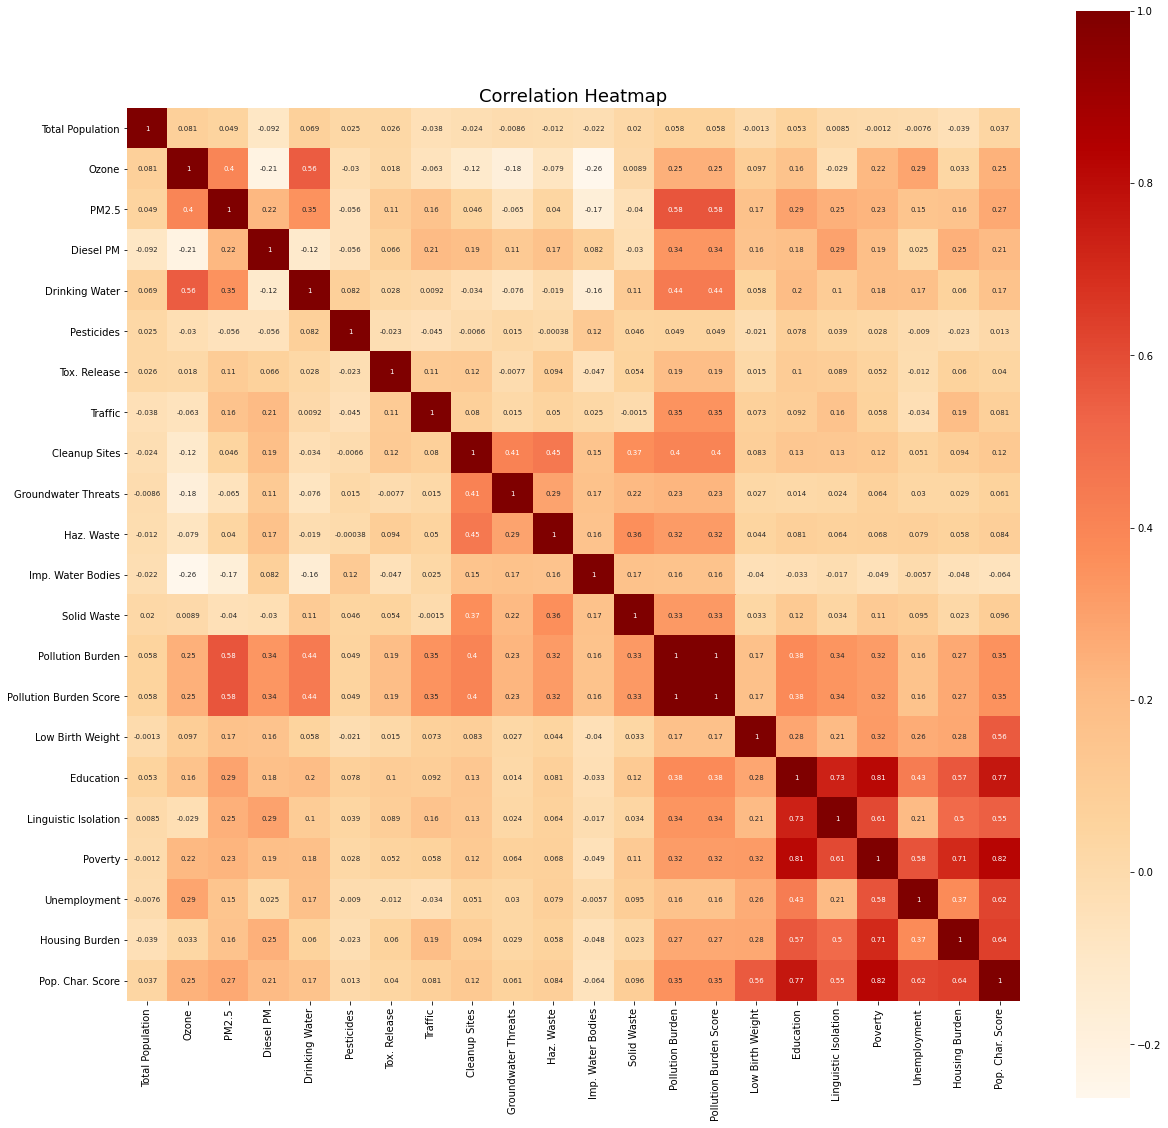

In [9]:
#create correlation heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df3.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

In [10]:
df3.drop(columns = ['Poverty', 'Pollution Burden'], axis = 1, inplace = True)

### Categorical Features

In [11]:
# #create dummy variables
# disadvantaged_dummies = pd.get_dummies(df3['SB 535 Disadvantaged Community'], prefix='disadvantaged', drop_first=True)
# california_county_dummies = pd.get_dummies(df3['California County'], prefix='ca_county', 
#                                            drop_first=True)

# df3 = pd.concat([df3, disadvantaged_dummies,california_county_dummies], 
#                    axis=1)

In [12]:
df3.head(2)

,Total Population,California County,SB 535 Disadvantaged Community,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight,Education,Linguistic Isolation,Unemployment,Housing Burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07


### Rename

In [15]:
df3.rename(columns = {'Total Population': 'total_population', 'California County': 'california_county', 
                     'Ozone': 'ozone', 'PM2.5': 'pm2_5', 'SB 535 Disadvantaged Community': 'sb_535_disadvantaged', 
                     'Diesel PM': 'diesel_pm', 'Drinking Water': 'drinking_water', 'Pesticides': 'pesticides', 
                     'Tox. Release': 'tox_release', 'Traffic': 'traffic', 'Cleanup Sites': 'cleanup_sites',  
                     'Groundwater Threats': 'groundwater_threats', 'Haz. Waste': 'haz_waste', 
                     'Imp. Water Bodies': 'imp_water_bodies', 'Solid Waste': 'solid_waste', 
                     'Pollution Burden Score': 'pollution_burden_score', 'Low Birth Weight': 'lbw', 
                     'Education': 'education', 'Linguistic Isolation': 'linguistic_isolation', 
                     'Unemployment': 'unemployment', 'Housing Burden': 'housing_burden', 
                     'Pop. Char. Score': 'Pop. Char. Score'}, inplace = True)

In [16]:
df3.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score
Census Tract,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07


In [17]:
df3.to_csv('data/cleaned/cleaned_ces3')

***

## CES 3 Demographics

In [18]:
dp3 = pd.read_csv('data/ces3results/demographic_profile_3.csv', index_col = 'Census Tract ')


In [19]:
dp3.head(2)

,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,Total Population,County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%)
Census Tract,,,,,,,,,,,,,,
6019001100,94.09,100.00,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
6071001600,90.68,99.99,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7


In [20]:
dp3.drop(columns = [' CES 3.0 Score', 'CES 3.0 Percentile', ' CES 3.0 \nPercentile Range', 
                  'Total Population', 'County'], axis = 1, inplace = True)

In [21]:
dp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 6019001100 to 6111980000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children < 10 (%)     8035 non-null   float64
 1   Pop 11-64 years (%)   8035 non-null   float64
 2   Elderly > 65 (%)      8035 non-null   float64
 3   Hispanic (%)          8024 non-null   float64
 4   White (%)             8024 non-null   float64
 5   African American (%)  8024 non-null   float64
 6   Native American (%)   8024 non-null   float64
 7   Asian American (%)    8024 non-null   float64
 8   Other (%)             8024 non-null   float64
dtypes: float64(9)
memory usage: 627.7 KB


In [22]:
dp3.isna().sum()

Children < 10 (%)        0
Pop 11-64 years (%)      0
Elderly > 65 (%)         0
Hispanic (%)            11
White (%)               11
African American (%)    11
Native American (%)     11
Asian American (%)      11
Other (%)               11
dtype: int64

In [23]:
dp3.rename(columns = {'Census Tract ': 'Census Tract', 'Children < 10 (%)' : 'less_10_yrs', 'Pop 11-64 years (%)' : 'yrs_11_64', 
                    'Elderly > 65 (%)': 'greater_65', 'Hispanic (%)': 'hispanic', 
                    'White (%)': 'white', 'African American (%)': 'african_american', 
                    'Native American (%)': 'native_american', 'Asian American (%)': 'asian_american', 
                    'Other (%)': 'other'}, inplace = True)

In [24]:
dp3.head(2)

,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other
Census Tract,,,,,,,,,
6019001100,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
6071001600,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7


In [25]:
dp3.to_csv('data/cleaned/cleaned_dp3')

***

# CES 2 Report

In [26]:
df2 = pd.read_csv('data/ces2results/CES_2.csv', index_col = 'Census Tract')

In [27]:
df2.head(2)

,Total Population,California County,ZIP,City,Longitude,Latitude,Click for interactive map,CES 2.0 Score,CES 2.0 \nPercentile Range,Hyperlink,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Age,Age Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,Click for map,89.22,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.255228,80.87,14.746087,97.83,44.23,93.91,519.88237,83.3,5.470140,53.90,96414.45837,99.81,1217.535680,66.95,85.5,98.86,55.75,85.47,0.52,74.84,0,0.0,5.0,81.49,78.621127,9.530973,99.95,26.4,67.66,130.748821,99.03,0.058025,94.73,55.2,95.60,21.6,83.66,77.500865,97.78,19.3,92.05,90.072268,9.360658,99.6
6019000300,3609,Fresno,93706,Fresno,-119.801035,36.726462,Click for map,83.71,96-100% (highest scores),http://oehha.maps.arcgis.com/apps/Viewer/index...,0.287130,83.28,14.619618,97.57,46.75,94.76,519.88237,83.3,37.749178,69.58,19637.97210,97.79,666.915834,36.06,23.5,86.17,27.50,68.24,0.16,50.42,0,0.0,1.0,37.88,71.967758,8.724451,99.45,29.9,88.03,132.400000,99.19,0.061233,98.40,47.3,91.05,18.3,78.34,81.204032,98.93,NaN,NaN,92.323243,9.594592,99.9


In [28]:
df2.drop(columns = ['Total Population', 'California County', 'ZIP', 'City', 'Longitude', 'Latitude', 'Click for interactive map', 
                   'CES 2.0 Score', 'CES 2.0 \nPercentile Range', 'Hyperlink', 'Ozone Pctl', 'PM2.5 Pctl', 
                   'Diesel PM Pctl', 'Drinking Water Pctl', 'Pesticides Pctl', 'Tox. Release Pctl', 'Traffic Pctl', 
                   'Cleanup Sites Pctl', 'Groundwater Threats Pctl', 'Haz. Waste Pctl', 'Imp. Water Bodies Pctl', 
                   'Solid Waste Pctl', 'Pollution Burden', 'Pollution Burden Pctl', 'Age', 'Age Pctl', 
                   'Asthma', 'Asthma Pctl', 'Low Birth Weight Pctl', 'Education Pctl', 'Linguistic Isolation Pctl', 
                   'Poverty', 'Poverty Pctl', 'Unemployment Pctl', 'Pop. Char. ', 'Pop. Char. Pctl', 
                   'Education', 'Linguistic Isolation', 'Unemployment', 'Pop. Char. Score'], axis = 1, inplace = True)

In [29]:
df2.shape

(8035, 14)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8035 entries, 6019001100 to 6111980000
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ozone                   7970 non-null   float64
 1   PM2.5                   7944 non-null   float64
 2   Diesel PM               8035 non-null   float64
 3   Drinking Water          8000 non-null   float64
 4   Pesticides              8035 non-null   float64
 5   Tox. Release            8023 non-null   float64
 6   Traffic                 8035 non-null   float64
 7   Cleanup Sites           8035 non-null   float64
 8   Groundwater Threats     8035 non-null   float64
 9   Haz. Waste              8035 non-null   float64
 10  Imp. Water Bodies       8035 non-null   int64  
 11  Solid Waste             8035 non-null   float64
 12  Pollution Burden Score  8035 non-null   float64
 13  Low Birth Weight        7994 non-null   float64
dtypes: float64(13), int64(1)


In [31]:
df2.isna().sum()

Ozone                     65
PM2.5                     91
Diesel PM                  0
Drinking Water            35
Pesticides                 0
Tox. Release              12
Traffic                    0
Cleanup Sites              0
Groundwater Threats        0
Haz. Waste                 0
Imp. Water Bodies          0
Solid Waste                0
Pollution Burden Score     0
Low Birth Weight          41
dtype: int64

In [32]:
#Ozone
df2['Ozone'] = df2['Ozone'].fillna(df2['Ozone'].mean())

#PM2.5 
df2['PM2.5'] = df2['PM2.5'].fillna(df2['PM2.5'].mean())

#Drinking Water
df2['Drinking Water'] = df2['Drinking Water'].fillna(df2['Drinking Water'].mean())

#Tox. Release
df2['Tox. Release'] = df2['Tox. Release'].fillna(df2['Tox. Release'].mean())

#Low Birth Weight
df2['Low Birth Weight'] = df2['Low Birth Weight'].fillna(df2['Low Birth Weight'].mean())

In [33]:
df2.isna().sum()

Ozone                     0
PM2.5                     0
Diesel PM                 0
Drinking Water            0
Pesticides                0
Tox. Release              0
Traffic                   0
Cleanup Sites             0
Groundwater Threats       0
Haz. Waste                0
Imp. Water Bodies         0
Solid Waste               0
Pollution Burden Score    0
Low Birth Weight          0
dtype: int64

In [34]:
df2.head(2)

,Ozone,PM2.5,Diesel PM,Drinking Water,Pesticides,Tox. Release,Traffic,Cleanup Sites,Groundwater Threats,Haz. Waste,Imp. Water Bodies,Solid Waste,Pollution Burden Score,Low Birth Weight
Census Tract,,,,,,,,,,,,,,
6019001100,0.255228,14.746087,44.23,519.88237,5.470140,96414.45837,1217.535680,85.5,55.75,0.52,0,5.0,9.530973,0.058025
6019000300,0.287130,14.619618,46.75,519.88237,37.749178,19637.97210,666.915834,23.5,27.50,0.16,0,1.0,8.724451,0.061233


In [35]:
df2.rename(columns = {'Ozone': 'prev_ozone', 'PM2.5': 'prev_pm2_5', 
                     'Diesel PM': 'prev_diesel_pm', 'Drinking Water': 'prev_drinking_water', 
                     'Pesticides': 'prev_pesticides', 
                     'Tox. Release': 'prev_tox_release', 'Traffic': 'prev_traffic', 'Cleanup Sites': 'prev_cleanup_sites',  
                     'Groundwater Threats': 'prev_groundwater_threats', 'Haz. Waste': 'prev_haz_waste', 
                     'Imp. Water Bodies': 'prev_imp_water_bodies', 'Solid Waste': 'prev_solid_waste', 
                     'Pollution Burden Score': 'prev_pollution_burden_score', 'Low Birth Weight': 'prev_lbw'}, inplace = True)

In [36]:
df2.head(2)

,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_pesticides,prev_tox_release,prev_traffic,prev_cleanup_sites,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_pollution_burden_score,prev_lbw
Census Tract,,,,,,,,,,,,,,
6019001100,0.255228,14.746087,44.23,519.88237,5.470140,96414.45837,1217.535680,85.5,55.75,0.52,0,5.0,9.530973,0.058025
6019000300,0.287130,14.619618,46.75,519.88237,37.749178,19637.97210,666.915834,23.5,27.50,0.16,0,1.0,8.724451,0.061233


In [37]:
df2.to_csv('data/cleaned/cleaned_ces2')

***

# Merge Data Frames

**1. CES 3 and Demographic Profile**

In [38]:
ces3 = pd.merge(df3, dp3, left_index = True, right_index = True)

In [39]:
ces3.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7


In [40]:
ces3.to_csv('data/merged/ces3_dp3')

**2. CES 3 and CES 3**

In [41]:
ces = pd.merge(df3, df2, left_index = True, right_index = True)

In [42]:
ces.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_pesticides,prev_tox_release,prev_traffic,prev_cleanup_sites,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_pollution_burden_score,prev_lbw
Census Tract,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,0.255228,14.746087,44.23,519.882370,5.470140,96414.458370,1217.535680,85.5,55.75,0.520,0,5.0,9.530973,0.058025
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,0.465401,13.888224,47.08,604.311803,1.363343,8122.687693,1232.874128,56.2,49.00,1.845,5,2.0,9.795127,0.063895


In [43]:
ces.to_csv('data/merged/ces3_ces2')

**3. CES3, Demographic Profile, and CES 2** 

In [44]:
df18 = pd.merge(ces3, df2, left_index = True, right_index = True)

In [45]:
df18.head(2)

,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_pesticides,prev_tox_release,prev_traffic,prev_cleanup_sites,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_pollution_burden_score,prev_lbw
6019001100,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,5.470140,96414.458370,1217.535680,85.5,55.75,0.520,0,5.0,9.530973,0.058025
6071001600,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,1.363343,8122.687693,1232.874128,56.2,49.00,1.845,5,2.0,9.795127,0.063895


In [46]:
df18.to_csv('data/merged/ces3_dp3_ces2')